## Simpler Solution 

This solution uses a classical Bag-of-Word representation. We divide the counts of each action by the length of the sequence and apply then a PCA on the 7 dimensional vector space.

This approach yield very much the same results as our deep learning approach on this simple example.


In [3]:
import os
import numpy as np
import pandas as pd
from gensim import corpora

In [4]:
logfile = pd.read_pickle('./Data/logfile.pkl')


In [5]:
corpus = corpora.Dictionary(logfile.SessionActivity)
bow = logfile.SessionActivity.map(corpus.doc2bow)

In [6]:
def find_num_action(a_id):
    def _find(doc):
        acs = [x[0] for x in doc]
        cnt = [x[1] for x in doc]
        if a_id in acs:
            return cnt[acs.index(a_id)]
        else:
            return 0
    return _find

logfile['n_actions'] =  bow.map(len)
logfile['A1'] =  bow.map(find_num_action(0))/logfile['n_actions']
logfile['A2'] =  bow.map(find_num_action(1))/logfile['n_actions']
logfile['A3'] =  bow.map(find_num_action(2))/logfile['n_actions']
logfile['A4'] =  bow.map(find_num_action(3))/logfile['n_actions']
logfile['A5'] =  bow.map(find_num_action(4))/logfile['n_actions']
logfile['A6'] =  bow.map(find_num_action(5))/logfile['n_actions']
logfile['A7'] =  bow.map(find_num_action(6))/logfile['n_actions']



In [7]:
profiles = logfile[['A1', 'A2','A3','A4','A5','A6', 'A7']]
profiles

,A1,A2,A3,A4,A5,A6,A7
0,0.500000,0.250000,0.250000,0.250000,0.000000,0.000000,0.000000
1,0.250000,0.000000,0.250000,0.250000,0.250000,0.000000,0.000000
2,0.200000,0.000000,0.200000,0.200000,0.200000,0.400000,0.000000
3,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000,0.333333
4,0.200000,0.000000,0.200000,0.200000,0.000000,0.600000,0.200000
5,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,0.000000
6,0.000000,0.250000,0.250000,0.250000,0.000000,0.250000,0.000000
7,0.200000,0.200000,0.200000,0.200000,0.000000,0.000000,0.200000
8,0.000000,0.000000,0.333333,0.333333,0.333333,0.000000,0.000000
9,0.250000,0.000000,0.250000,0.250000,0.000000,0.000000,0.250000


In [8]:
from sklearn import decomposition

latent_space_rep = decomposition.PCA(n_components=3).fit_transform(profiles)

/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [9]:
logfile['PCA_1']= latent_space_rep[:,0]
logfile['PCA_2']= latent_space_rep[:,1]
logfile['PCA_3']= latent_space_rep[:,2]

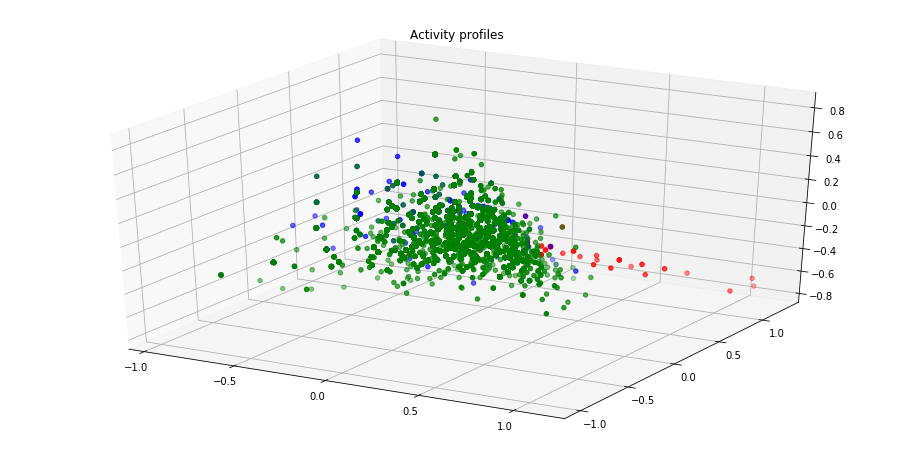

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')
plt.title('Activity profiles')

ax.scatter(logfile.loc[(logfile.FraudulentActivity==0) & (logfile.UserRole==0), 'PCA_1'], 
           logfile.loc[(logfile.FraudulentActivity==0) & (logfile.UserRole==0), 'PCA_2'], 
           logfile.loc[(logfile.FraudulentActivity==0) & (logfile.UserRole==0), 'PCA_3'], color='green')
ax.scatter(logfile.loc[(logfile.FraudulentActivity==0) & (logfile.UserRole==1), 'PCA_1'], 
           logfile.loc[(logfile.FraudulentActivity==0) & (logfile.UserRole==1), 'PCA_2'], 
           logfile.loc[(logfile.FraudulentActivity==0) & (logfile.UserRole==1), 'PCA_3'], color='blue')
ax.scatter(logfile.loc[logfile.FraudulentActivity==1, 'PCA_1'], 
           logfile.loc[logfile.FraudulentActivity==1, 'PCA_2'], 
           logfile.loc[logfile.FraudulentActivity==1, 'PCA_3'], color='red')
    
ax.grid(True)
plt.savefig('activityprofiles_bow_pca.png', dpi=500)

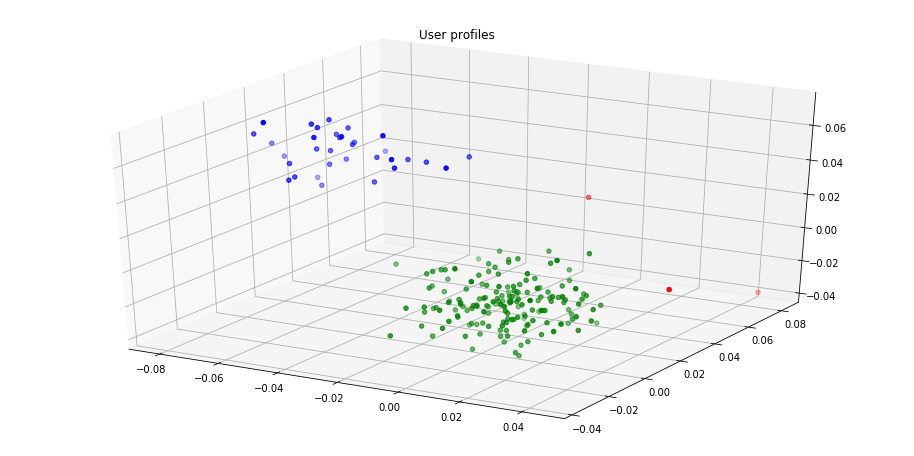

In [13]:
user_profiles = logfile.groupby(['UserID', 'UserRole', 'PotentialFraudster'], as_index=False).agg({
    'PCA_1':np.mean,
    'PCA_2':np.mean,
    'PCA_3':np.mean,
})

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')
plt.title('User profiles')

ax.scatter(user_profiles.loc[(user_profiles.UserRole==0) & (user_profiles.PotentialFraudster==0), 'PCA_1'], 
           user_profiles.loc[(user_profiles.UserRole==0) & (user_profiles.PotentialFraudster==0), 'PCA_2'], 
           user_profiles.loc[(user_profiles.UserRole==0) & (user_profiles.PotentialFraudster==0), 'PCA_3'], color='green')
ax.scatter(user_profiles.loc[(user_profiles.UserRole==1) & (user_profiles.PotentialFraudster==0), 'PCA_1'], 
           user_profiles.loc[(user_profiles.UserRole==1) & (user_profiles.PotentialFraudster==0), 'PCA_2'], 
           user_profiles.loc[(user_profiles.UserRole==1) & (user_profiles.PotentialFraudster==0), 'PCA_3'], color='blue')
ax.scatter(user_profiles.loc[user_profiles.PotentialFraudster==1, 'PCA_1'], 
           user_profiles.loc[user_profiles.PotentialFraudster==1, 'PCA_2'], 
           user_profiles.loc[user_profiles.PotentialFraudster==1, 'PCA_3'], color='red')
ax.grid(True)

plt.savefig('userprofiles_bow_pca.png', dpi=500)